
##About the Dataset

   Fashion-MNIST is a dataset of of a training  set of 60,000 examples and a test set of 10,000 examples.

  Each example is a 28x28 grayscale image, associated with a label from 10 classes.

  Each training and test example is assigned to one of the following labels:

            0 T-shirt/top
            1 Trouser
            2 Pullover
            3 Dress
            4 Coat
            5 Sandal
            6 Shirt
            7 Sneaker
            8 Bag
            9 Ankle boot

#Task

  To come up with a model that can predict label for each image



##Libraries

In [1]:
# for numerical analysis
import numpy as np
# to store and process in a dataframe
import pandas as pd

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
# import train and test dataset
train = pd.read_csv('/content/drive/MyDrive/fasion mnist/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/fasion mnist/fashion-mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(train.shape)

(60000, 785)


In [5]:
print(test.shape)

(10000, 785)


In [6]:
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


In [7]:
# actural item corresponding to each label
item = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

<ipython-input-38-13d45fc5c162>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


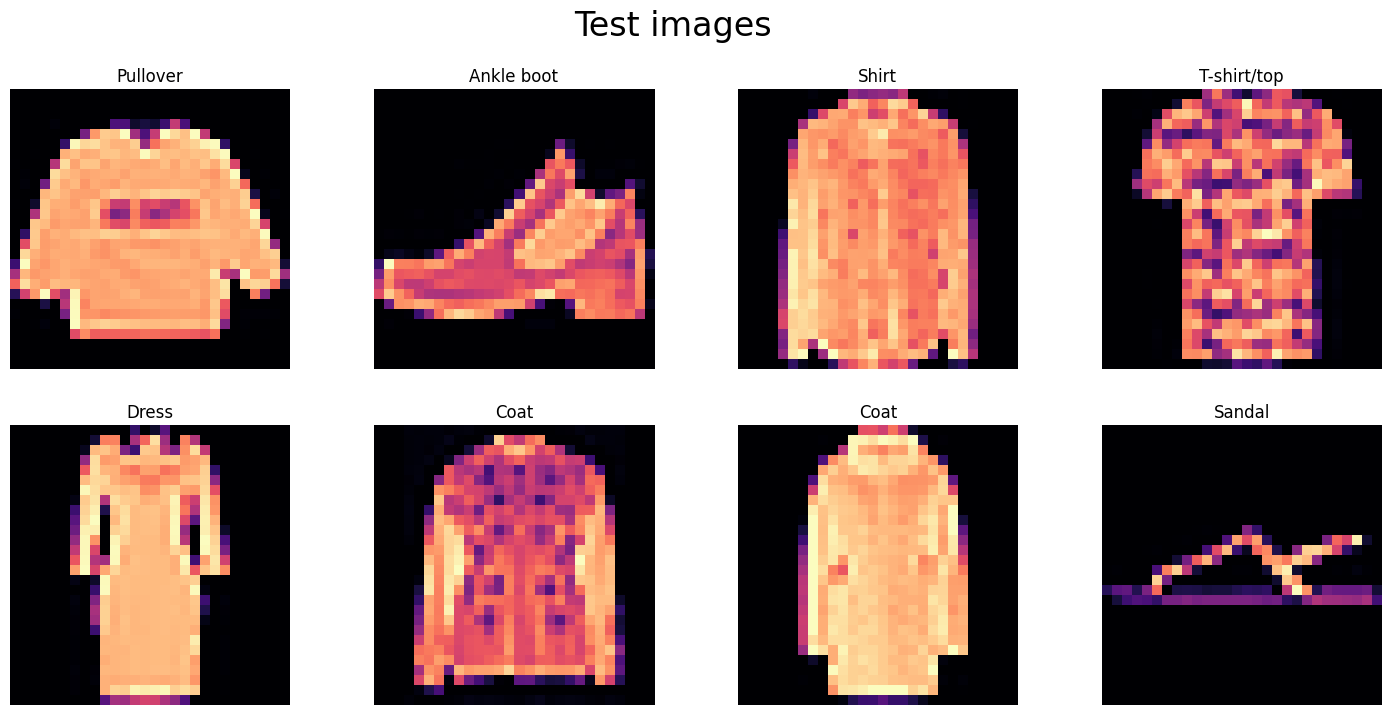

In [38]:
# first few train images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

<ipython-input-37-58be5b90b3ec>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


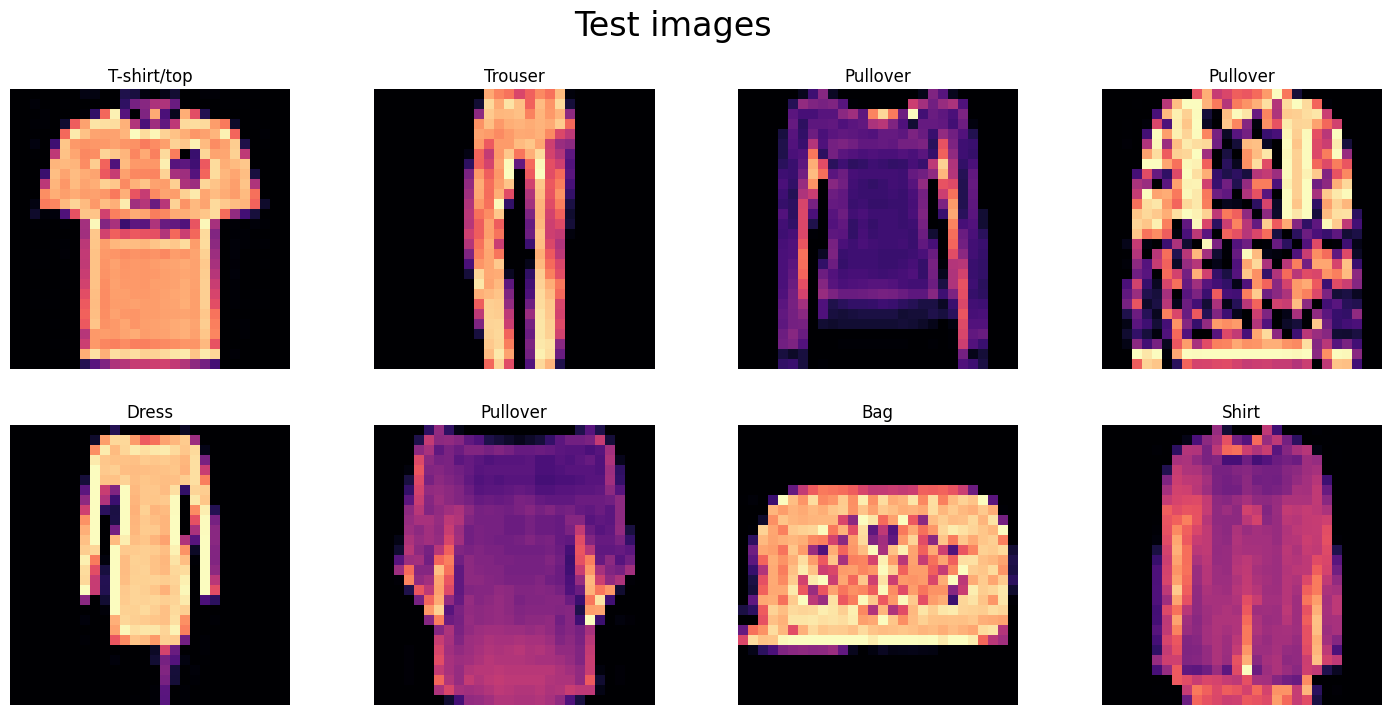

In [37]:
# first few test images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

Preprocessing

In [9]:
# split into image and labels and convert to numpy array
X_train = train.iloc[:, 1:].to_numpy()
y_train = train['label'].to_numpy()

X_test = test.iloc[:, 1:].to_numpy()
y_test = test['label'].to_numpy()

for i in [X_train, y_train, X_test, y_test]:
    print(i.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Train and test images

In [10]:
# reshaping images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [11]:
# fix data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
# normalizing images
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
# one hot encoding targets
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

In [16]:
# shape
for i in [X_train, y_train_enc, X_test, y_test_enc]:
    print(i.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [17]:
# train validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X_train, y_train_enc, test_size=0.3)
for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(42000, 28, 28, 1)
(42000, 10)
(18000, 28, 28, 1)
(18000, 10)


##CNN

Model Parameters

In [18]:
INPUT_SHAPE=(28,28,1)
OUTPUT_SHAPE=10
BATCH_SIZE=128
EPOCHS=10
VERBOSE=2

#Defining CNN model

In [19]:
model=  Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


Compile model

In [20]:
# If the targets are one-hot encoded, use categorical_crossentropy.
# But if the targets are integers, use sparse_categorical_crossentropy

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Model summary

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

Model fitting

In [22]:
history = model.fit(X_train, y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
230/230 - 28s - loss: 0.8191 - accuracy: 0.6992 - val_loss: 0.4921 - val_accuracy: 0.8222 - 28s/epoch - 120ms/step
Epoch 2/10
230/230 - 24s - loss: 0.4910 - accuracy: 0.8219 - val_loss: 0.3976 - val_accuracy: 0.8552 - 24s/epoch - 106ms/step
Epoch 3/10
230/230 - 26s - loss: 0.4154 - accuracy: 0.8495 - val_loss: 0.3585 - val_accuracy: 0.8704 - 26s/epoch - 112ms/step
Epoch 4/10
230/230 - 25s - loss: 0.3717 - accuracy: 0.8686 - val_loss: 0.3530 - val_accuracy: 0.8726 - 25s/epoch - 107ms/step
Epoch 5/10
230/230 - 24s - loss: 0.3428 - accuracy: 0.8769 - val_loss: 0.3164 - val_accuracy: 0.8872 - 24s/epoch - 105ms/step
Epoch 6/10
230/230 - 27s - loss: 0.3164 - accuracy: 0.8849 - val_loss: 0.3091 - val_accuracy: 0.8850 - 27s/epoch - 117ms/step
Epoch 7/10
230/230 - 26s - loss: 0.2946 - accuracy: 0.8929 - val_loss: 0.3054 - val_accuracy: 0.8870 - 26s/epoch - 112ms/step
Epoch 8/10
230/230 - 27s - loss: 0.2811 - accuracy: 0.8980 - val_loss: 0.2926 - val_accuracy: 0.8945 - 27s/epoch - 117

Accuracy and loss

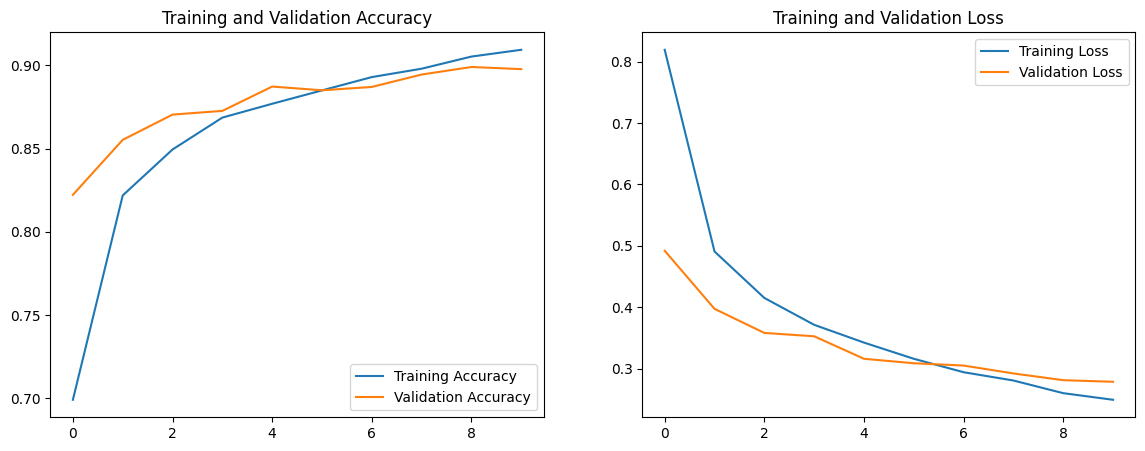

In [23]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

Evaluating model

In [39]:
# model loss and accuracy on validation set
model.evaluate(X_val, y_val_enc)

563/563 [==============================] - 7s 12ms/step - loss: 0.2705 - accuracy: 0.9016


[0.27053555846214294, 0.9016110897064209]

Predicting on test

In [40]:
# predicted values
y_pred_enc = model.predict(X_test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

313/313 [==============================] - 3s 8ms/step
[9.8751819e-01 6.7831132e-07 8.1558013e-04 7.8392669e-04 1.3829034e-05
 7.6532380e-08 1.0864161e-02 8.7428518e-09 3.5090745e-06 7.5322149e-08]
0


<ipython-input-48-e941a05ebcff>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


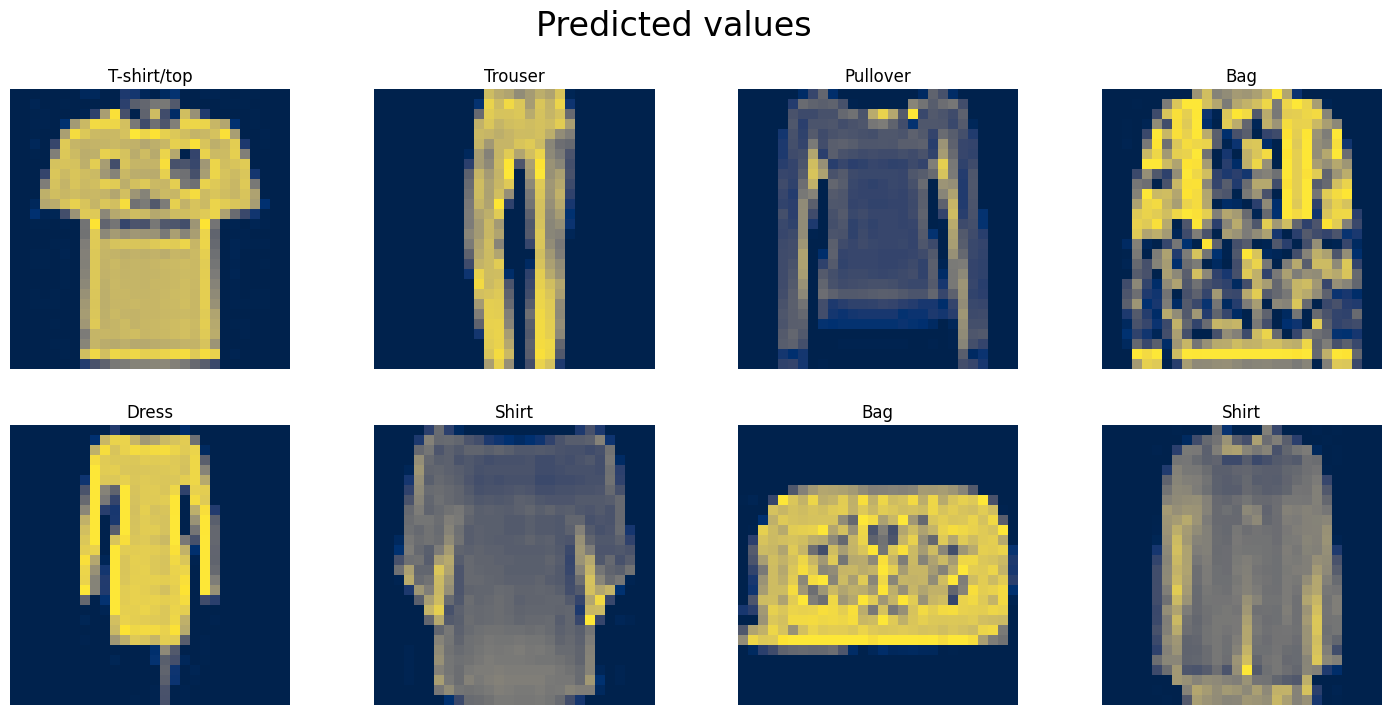

In [48]:
# predicted targets of each images
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in enumerate(X_test[:8]):
    plt.subplot(2, 4, ind+1)
    plt.title(item[y_pred[ind]])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.85      0.85      1000
           3       0.91      0.91      0.91      1000
           4       0.83      0.88      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.79      0.65      0.72      1000
           7       0.96      0.94      0.95      1000
           8       0.96      0.99      0.97      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



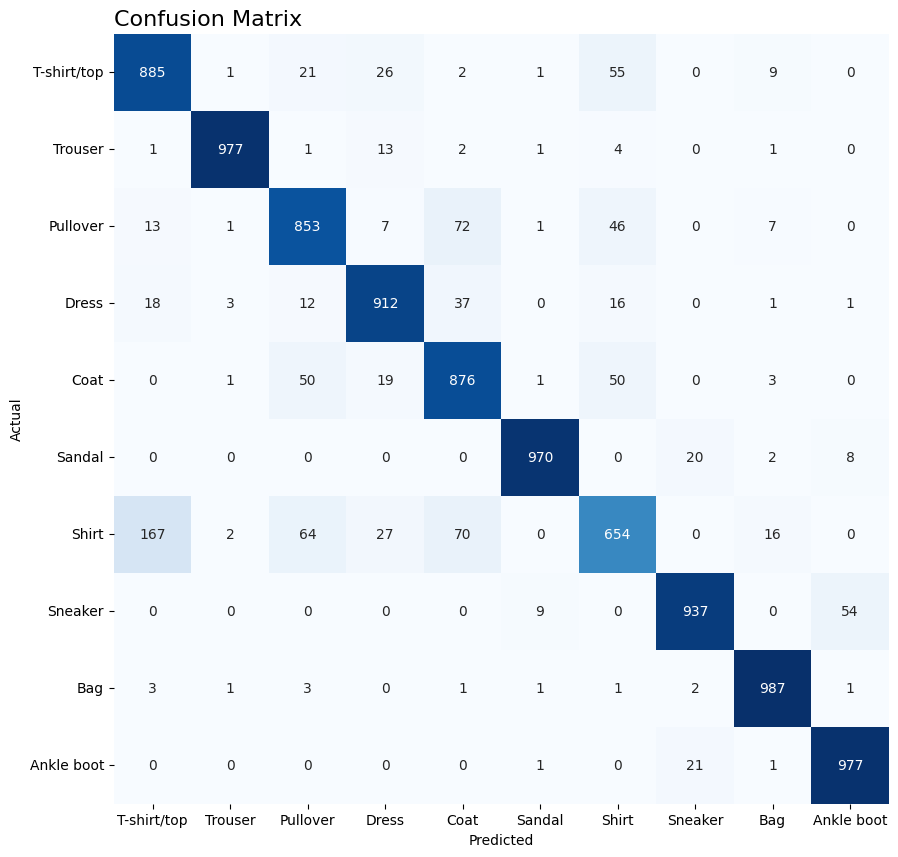

In [43]:
# y_pred_item = [item[i] for i in y_pred]
# y_test_item = [item[i] for i in y_test]

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(item.values())
ax.set_yticklabels(item.values(), rotation=0)
plt.show()